In [4]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch
import torch.nn as nn
import torchvision.models as models

# Importing CIFAR10

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda img: img / 255.0)
])

# Load CIFAR-10 training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Load CIFAR-10 testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Building the Convolutional Neural Network Model

In [3]:
class ConvNet(nn.Module):
    def __init__(self, num_of_classes=10):
        super(ConvNet, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, num_of_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [4]:
num_of_classes = 10

# Instantiate the model
model = ConvNet(num_of_classes).to("cuda")

# Print the model summary
print(model)

ConvNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

# Define the loss function and optimizer

In [5]:
criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training the Model

In [6]:
num_epochs=20
Train_Accuracy_List = []
Test_Accuracy_List = []
for epoch in range(num_epochs):
    correct_train = 0
    total_train = 0
    correct_test = 0
    total_test = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to("cuda"), targets.to("cuda")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        _, predicted = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        for inputs,targets in test_loader:
            inputs, targets = inputs.to("cuda"), targets.to("cuda")
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = torch.max(outputs, 1)
            total_test += targets.size(0)
            correct_test += (predicted == targets).sum().item()

    accuracy_train = correct_train / total_train
    accuracy_test = correct_test / total_test
    Train_Accuracy_List.append(accuracy_train)
    Test_Accuracy_List.append(accuracy_test)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Accuracy: {100 * accuracy_train:.2f}%, Test Accuracy: {100 * accuracy_test:.2f}%')


Epoch 1/20, Loss: 1.7454, Train Accuracy: 35.86%, Test Accuracy: 46.77%
Epoch 2/20, Loss: 1.1935, Train Accuracy: 57.23%, Test Accuracy: 62.96%
Epoch 3/20, Loss: 1.2683, Train Accuracy: 66.29%, Test Accuracy: 68.30%
Epoch 4/20, Loss: 1.0187, Train Accuracy: 71.09%, Test Accuracy: 72.31%
Epoch 5/20, Loss: 1.0127, Train Accuracy: 74.81%, Test Accuracy: 74.29%
Epoch 6/20, Loss: 1.0902, Train Accuracy: 77.65%, Test Accuracy: 75.91%
Epoch 7/20, Loss: 1.2093, Train Accuracy: 80.12%, Test Accuracy: 78.14%
Epoch 8/20, Loss: 1.1177, Train Accuracy: 81.78%, Test Accuracy: 79.20%
Epoch 9/20, Loss: 0.7574, Train Accuracy: 83.36%, Test Accuracy: 79.94%
Epoch 10/20, Loss: 0.8019, Train Accuracy: 84.66%, Test Accuracy: 80.26%
Epoch 11/20, Loss: 0.8315, Train Accuracy: 85.59%, Test Accuracy: 81.11%
Epoch 12/20, Loss: 0.9883, Train Accuracy: 86.93%, Test Accuracy: 80.67%
Epoch 13/20, Loss: 0.8038, Train Accuracy: 87.22%, Test Accuracy: 81.73%
Epoch 14/20, Loss: 1.2939, Train Accuracy: 88.28%, Test Accu

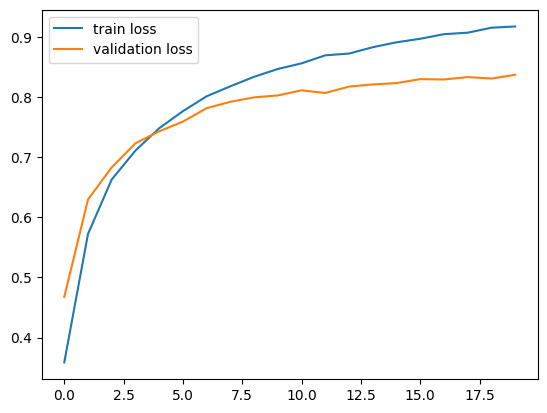

In [7]:
import matplotlib.pyplot as plt
plt.plot(Train_Accuracy_List, label='train loss')
plt.plot(Test_Accuracy_List, label='validation loss')
plt.legend()
plt.show()

# ResNet 50

In [27]:
from torchvision.models import resnet50
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomResNet50, self).__init__()
        self.resnet = resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V2)
        # Modify the first convolutional layer to accept 3x32x32 input
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Modify the classifier to have num_classes output classes
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

In [31]:
model = CustomResNet50(num_classes=10).to("cuda")
model

CustomResNet50(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

In [32]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
num_epochs=10
Train_Accuracy_List = []
Test_Accuracy_List = []
for epoch in range(num_epochs):
    correct_train = 0
    total_train = 0
    correct_test = 0
    total_test = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to("cuda"), targets.to("cuda")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        _, predicted = torch.max(outputs, 1)
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        for inputs,targets in test_loader:
            inputs, targets = inputs.to("cuda"), targets.to("cuda")
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = torch.max(outputs, 1)
            total_test += targets.size(0)
            correct_test += (predicted == targets).sum().item()

    accuracy_train = correct_train / total_train
    accuracy_test = correct_test / total_test
    Train_Accuracy_List.append(accuracy_train)
    Test_Accuracy_List.append(accuracy_test)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Accuracy: {100 * accuracy_train:.2f}%, Test Accuracy: {100 * accuracy_test:.2f}%')


Epoch 1/10, Loss: 1.1705, Train Accuracy: 67.41%, Test Accuracy: 70.26%
Epoch 2/10, Loss: 1.2516, Train Accuracy: 73.42%, Test Accuracy: 73.47%
Epoch 3/10, Loss: 1.0252, Train Accuracy: 77.68%, Test Accuracy: 75.20%
Epoch 4/10, Loss: 0.3028, Train Accuracy: 81.06%, Test Accuracy: 75.25%
Epoch 5/10, Loss: 0.8904, Train Accuracy: 83.99%, Test Accuracy: 76.27%
Epoch 6/10, Loss: 0.7696, Train Accuracy: 86.60%, Test Accuracy: 77.97%
Epoch 7/10, Loss: 0.9977, Train Accuracy: 88.39%, Test Accuracy: 78.26%
Epoch 8/10, Loss: 0.7218, Train Accuracy: 90.59%, Test Accuracy: 78.67%
Epoch 9/10, Loss: 0.4228, Train Accuracy: 92.05%, Test Accuracy: 78.73%
Epoch 10/10, Loss: 1.1174, Train Accuracy: 93.20%, Test Accuracy: 78.39%


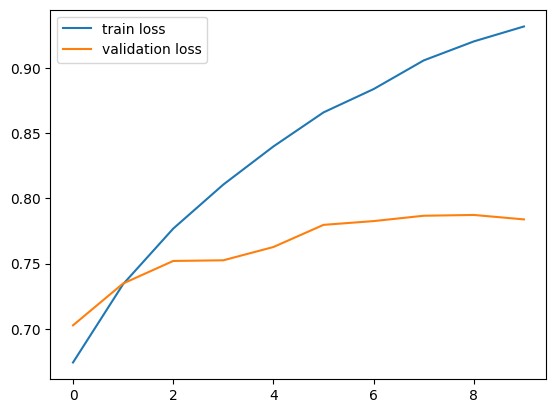

In [35]:
import matplotlib.pyplot as plt
plt.plot(Train_Accuracy_List, label='train loss')
plt.plot(Test_Accuracy_List, label='validation loss')
plt.legend()
plt.show()